In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

In [29]:
import mitosheet

In [30]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

### Unstructured Variance, n_input = 12, n_output = 1

In [31]:
m = n_input = 12
s = n_output = 1

In [32]:
np.random.seed(0)
x_min = np.random.randint(1,101, m+s)
x_min

array([45, 48, 65, 68, 68, 10, 84, 22, 37, 88, 71, 89, 89])

In [33]:
np.random.seed(3)
delta_x = np.random.uniform(1,1000, m+s)
delta_x

array([551.25, 708.44, 291.61, 511.32, 893.05, 896.4 , 126.46, 208.04,  52.42, 441.37,  30.85, 457.38, 649.49])

In [34]:
x_max = x_min + delta_x
x_max

array([596.25, 756.44, 356.61, 579.32, 961.05, 906.4 , 210.46, 230.04,  89.42, 529.37, 101.85, 546.38, 738.49])

In [35]:
mean_q = (x_min + x_max)  * 0.5
mean_q

array([320.62, 402.22, 210.81, 323.66, 514.53, 458.2 , 147.23, 126.02,  63.21, 308.68,  86.42, 317.69, 413.75])

In [36]:
std_max = (x_max - x_min) * 0.5 * (1/3)
std_max

array([ 91.87, 118.07,  48.6 ,  85.22, 148.84, 149.4 ,  21.08,  34.67,   8.74,  73.56,   5.14,  76.23, 108.25])

In [37]:
np.random.seed(0)
std_list = []

for i in std_max:
    std_list.append(np.random.uniform(0,i))

In [38]:
std_list

[50.421975840805594,
 84.4447536883445,
 29.29568986598928,
 46.43465221571648,
 63.0577693835027,
 96.49623556796311,
 9.222859744485133,
 30.920093787576622,
 8.418515490239715,
 28.20653544760278,
 4.070302581581033,
 40.31734161748291,
 61.49034123825756]

In [39]:
cov_matrix_int = []

for i in range(m + s):
    for j in range(m + s):
        
        if j>i:
            min_ = - std_list[i] *  std_list[j]
            max_ = std_list[i] *  std_list[j]
            
            cov_matrix_int.append((i, j, min_, max_)) 

In [40]:
cov_matrix_int[:3]

[(0, 1, -4257.8713303564855, 4257.8713303564855),
 (0, 2, -1477.1465666626448, 1477.1465666626448),
 (0, 3, -2341.3269121970666, 2341.3269121970666)]

In [41]:
len(cov_matrix_int)

78

In [42]:
cov_list = []
np.random.seed(1)

for i, el in enumerate(cov_matrix_int):
    n = np.random.uniform(el[2],el[3])
#    print(i)
#    if i>(len(cov_matrix_int)/2)-1:
#        if (cov_list[el[0]-1] * cov_list[el[1]-1] < 0) and  n < 0:
#            n = n   
#        else:
#            n=-n
    cov_list.append(n)
cov_list[:5]

[-706.6192544547307,
 650.9031380795407,
 -2340.7913345212123,
 -1256.966112888079,
 -3437.440227651161]

In [43]:
cov_matrix = np.zeros((m + s, m + s))
print(len(cov_matrix))
cov_matrix

13


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [44]:
k=0
l=0
for i in range(len(cov_matrix)):
    for j in range(len(cov_matrix)):
        if j>i:
            cov_matrix[i][j] = cov_matrix[j][i] = cov_list[k]
            k += 1
        if i == j:
            cov_matrix[i][j] = np.square(std_list[l]) 
            l += 1 
np.set_printoptions(suppress=True)
print(cov_matrix)

[[ 2542.38  -706.62   650.9  -2340.79 -1256.97 -3437.44  -379.15  -978.27  -131.11  -293.64    15.93  -328.54  1148.53]
 [ -706.62  7130.92 -1462.29  2965.32 -5033.23  2778.14  -128.81   306.48  -511.3  -1438.18   206.74  3188.48 -1937.6 ]
 [  650.9  -1462.29   858.24   523.25  1390.62  2231.05  -224.23  -835.07  -162.86   624.94   -95.79  -186.36  1649.69]
 [-2340.79  2965.32   523.25  2156.18   194.22  1719.51  -158.01   535.54   261.62 -1261.85    94.56  1830.41  1417.17]
 [-1256.97 -5033.23  1390.62   194.22  3976.28 -2671.93   336.47 -1547.22   -55.32  1453.49  -105.94 -1079.09 -2869.09]
 [-3437.44  2778.14  2231.05  1719.51 -2671.93  9311.52  -855.5   1067.17  -468.52 -1276.28    -6.62 -3475.26   879.57]
 [ -379.15  -128.81  -224.23  -158.01   336.47  -855.5     85.06  -201.49    13.87   103.93   -29.86   -63.92   220.5 ]
 [ -978.27   306.48  -835.07   535.54 -1547.22  1067.17  -201.49   956.05   -44.68  -785.02     9.04   408.38    56.62]
 [ -131.11  -511.3   -162.86   261.62   

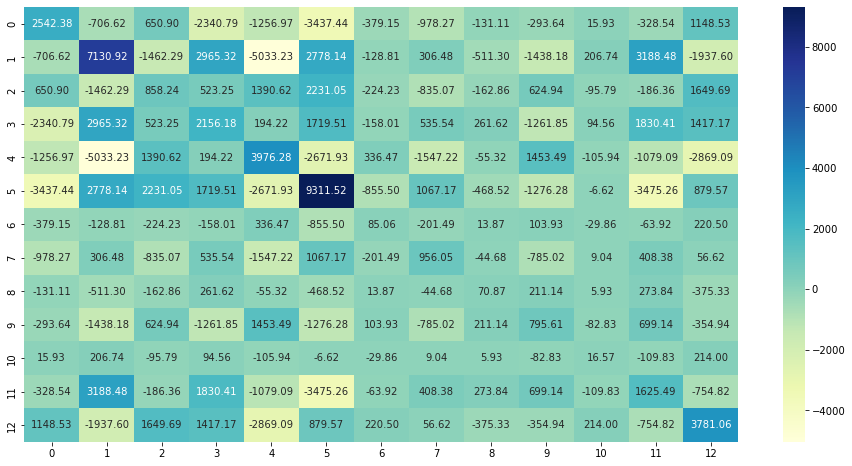

In [45]:
plt.figure(figsize = (16,8))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='YlGnBu');

In [46]:
mask = np.triu(np.ones_like(cov_matrix, dtype=bool))
# mask[np.triu_indices_from(mask)] = True
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False, False,  True,  True,  True,  True],


In [47]:
pd.DataFrame(cov_matrix).mask(~mask).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2542.375648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-706.619254,7130.916425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,650.903138,-1462.291839,858.237445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-2340.791335,2965.320028,523.246436,2156.176926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1256.966113,-5033.225534,1390.623062,194.220259,3976.282280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,-131.112204,-511.297467,-162.856950,261.617604,-55.321736,-468.520715,13.867862,-44.678493,70.871403,NaN,NaN,NaN,NaN
9,-293.640635,-1438.180466,624.940925,-1261.854131,1453.489598,-1276.281688,103.932245,-785.015031,211.144412,795.608642,NaN,NaN,NaN
10,15.932926,206.741259,-95.788112,94.556094,-105.943720,-6.619602,-29.856596,9.035422,5.931774,-82.828740,16.567363,NaN,NaN
11,-328.535715,3188.475466,-186.363408,1830.414941,-1079.086694,-3475.260752,-63.915047,408.378046,273.839035,699.138447,-109.833282,1625.488035,NaN


In [48]:
pd.DataFrame(cov_matrix).mask(mask).to_numpy()

array([[     nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
       [ -706.62,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
       [  650.9 , -1462.29,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
       [-2340.79,  2965.32,   523.25,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
       [-1256.97, -5033.23,  1390.62,   194.22,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
       [-3437.44,  2778.14,  2231.05,  1719.51, -2671.93,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
       [ -379.15,  -128.81,  -224.23,  -158.01,   336.47,  -855.5 ,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
       [ -978.27,   306.48,

In [49]:
my_colorsc=[[0, '#2effd7'],#white
            [1, '#006a55']]

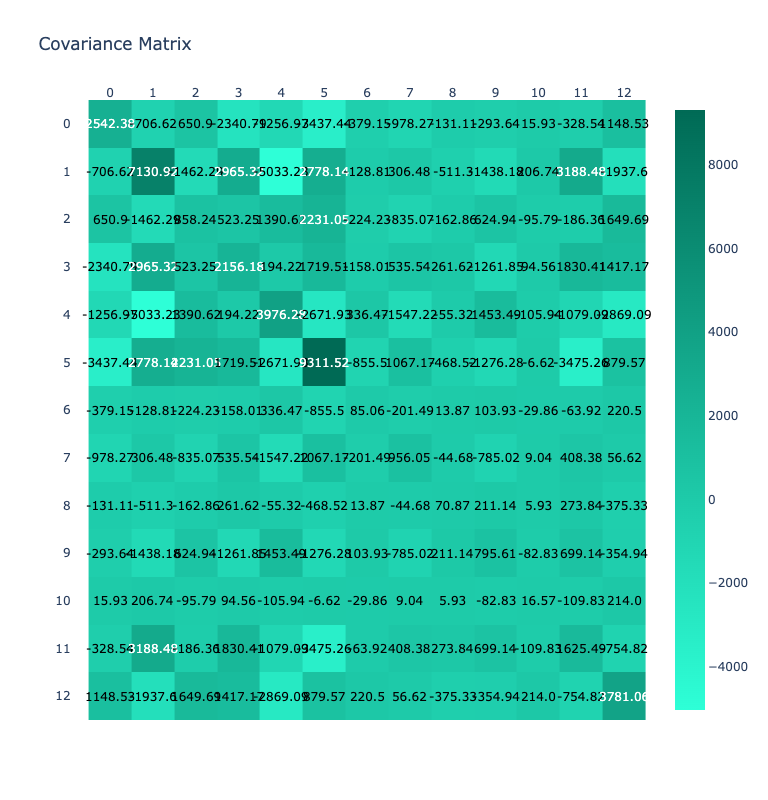

In [50]:
fig = ff.create_annotated_heatmap(pd.DataFrame(cov_matrix).to_numpy().T.round(2),
                                  x = pd.DataFrame(cov_matrix).columns.tolist(),
                                  y = pd.DataFrame(cov_matrix).columns.tolist(),
                                  showscale=True, colorscale=my_colorsc )

fig.update_layout(
    autosize=False,
    width=1200,
    height=800,
    title_text="Covariance Matrix",
        xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_white'
)

for i in range(len(fig.layout.annotations)):
    if fig.layout.annotations[i].text == 'nan':
        fig.layout.annotations[i].text = ""

fig.show()

In [51]:
np.random.seed(0)
US_15 = pd.DataFrame(np.random.multivariate_normal(mean_q, cov_matrix, 1000))
US_15.columns = ["Input " + str(i + 1) for i in range(m)] + ["Output " + str(i + 1) for i in range(s)]
US_15.index = ["DMU " + str(i + 1).zfill(4) for i in range(len(US_15))]
US_15 = US_15.round(2)
US_15.head()

/var/folders/6l/c4m0953s1_jgnd_y35l2l7kc0000gp/T/ipykernel_86812/1115992842.py:2: RuntimeWarning:

covariance is not positive-semidefinite.



,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Input 11,Input 12,Output 1
DMU 0001,288.81,493.46,202.31,356.18,384.45,653.77,129.40,100.28,38.45,306.59,92.41,250.91,250.77
DMU 0002,349.98,420.00,139.32,312.89,543.04,504.54,120.43,177.65,86.96,330.87,79.16,201.81,372.71
DMU 0003,280.78,452.42,127.85,315.42,559.22,466.35,166.57,165.57,81.43,359.75,83.23,246.78,293.40
DMU 0004,405.33,376.32,237.28,451.43,414.19,318.03,187.77,154.65,49.71,316.82,97.74,344.70,462.69
DMU 0005,348.96,426.79,170.01,292.91,502.76,342.94,146.53,165.78,63.80,329.79,76.17,355.61,374.18


In [52]:
(US_15<=0).sum()

Input 1     0
Input 2     0
Input 3     0
Input 4     0
Input 5     0
Input 6     0
Input 7     0
Input 8     0
Input 9     0
Input 10    0
Input 11    0
Input 12    0
Output 1    0
dtype: int64

In [53]:
US_15.to_excel("Data/US12I1O.xlsx")

In [54]:
df = pd.read_excel("Data/US12I1O.xlsx", index_col = 0)
df

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Input 11,Input 12,Output 1
DMU 0001,288.81,493.46,202.31,356.18,384.45,653.77,129.40,100.28,38.45,306.59,92.41,250.91,250.77
DMU 0002,349.98,420.00,139.32,312.89,543.04,504.54,120.43,177.65,86.96,330.87,79.16,201.81,372.71
DMU 0003,280.78,452.42,127.85,315.42,559.22,466.35,166.57,165.57,81.43,359.75,83.23,246.78,293.40
DMU 0004,405.33,376.32,237.28,451.43,414.19,318.03,187.77,154.65,49.71,316.82,97.74,344.70,462.69
DMU 0005,348.96,426.79,170.01,292.91,502.76,342.94,146.53,165.78,63.80,329.79,76.17,355.61,374.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,206.54,333.40,274.01,424.09,465.99,548.04,143.02,58.25,49.65,355.16,85.54,238.49,279.23
DMU 0997,328.82,415.09,121.60,268.46,494.32,454.22,150.96,143.44,65.04,374.88,69.81,261.57,344.45
DMU 0998,310.52,565.44,126.06,320.91,463.01,390.07,151.81,202.55,101.67,333.12,87.52,328.13,320.62
DMU 0999,390.34,255.88,209.15,269.76,576.57,261.14,162.39,102.92,66.70,401.16,72.50,318.26,380.24
